# IRIS: Python embebido

In [1]:
import iris

#Pandas dataframes
import pandas as pd
pd.options.display.max_rows = 9


In [2]:
print('\nInterSystems IRIS version:')
irisVersion = iris.cls('%SYSTEM.Version').GetVersion()
print(irisVersion)



InterSystems IRIS version:
IRIS for UNIX (Ubuntu Server LTS for x86-64 Containers) 2022.1 (Build 152U) Fri Mar 18 2022 01:14:43 EDT


# SQL
Las consultas SQL se hacen así:

iris.sql.exec('select * from ...')

In [3]:
rs = iris.sql.exec('SELECT TOP 5 * FROM %SYS.ProcessQuery')
df = rs.dataframe()

jsn = df.to_json
print(jsn)
#df
df.dtypes
print(df.columns)
print(df.size)


<bound method NDFrame.to_json of     id namespace  routine  linesexecuted  globalreferences state pidexternal  \
0  395            CONTROL              0                 0   RUN         395   
1  436             WRTDMN             27               333  RUNW         436   
2  437             GARCOL              0                 0  RUNW         437   
3  438             JRNDMN            159                 9  RUNW         438   
4  446             EXPDMN              0                 0  RUNW         446   

  username clientipaddress clientnodename  ... globalblocks journalentries  \
0                                          ...            0              0   
1                                          ...            0              0   
2                                          ...            0              0   
3                                          ...            0              0   
4                                          ...            0              0   

  memorypeak role

## Data frames
Es una estructura de datos que puede almacenar el resultado de una consulta

In [4]:
statement = iris.sql.exec('SELECT * FROM Titanic_Table.Passenger')
df = statement.dataframe()
df

,id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,1,2,W./C. 6607,23.4500,,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.7500,,Q


# Llamando a las clases de IRIS
iris.cls('clase').metodo()

In [5]:
lf = iris.cls('%Library.File')
print(lf.ManagerDirectory())

/usr/irissys/mgr/


# Clases persistentes
Recordad que los % tienen que ser substituidos por _ 

```
Class Sample.Company Extends (%Persistent, %Populate, %XML.Adaptor)
{

/// The company's name.
Property Name As %String(MAXLEN = 80, POPSPEC = "Company()") [ Required ];

/// The company's mission statement.
Property Mission As %String(MAXLEN = 200, POPSPEC = "Mission()");

/// The unique Tax ID number for the company.
Property TaxID As %String [ Required ];

/// The last reported revenue for the company.
Property Revenue As %Integer;

}
```

In [6]:
myCompany = iris.cls('ObjectScript.Sample.Company')._New()
myCompany.Name = 'Acme Widgets Webinar!, Inc.'
myCompany.TaxID = '123456789'
status = myCompany._Save()
print (status)

1


In [7]:
print(myCompany._Id())


8


In [8]:
yourCompany = iris.cls("ObjectScript.Sample.Company")._OpenId(1)

In [9]:
print(yourCompany.Name)


Acme Widgets Webinar!, Inc.


## Añadimos un método escrito en Python:
```
Method Print() [ Language = python ]
{
    print ('\nName: ' + self.Name + ' TaxID: ' + self.TaxID)
}
```

In [10]:
yourCompany.Print()


Name: Acme Widgets Webinar!, Inc. TaxID: 123456789


# Manejando Globals

In [11]:
myGref = iris.gref('^Workdays')

In [12]:
myGref[None] = 5

In [13]:
myGref[1] = 'Monday'

In [14]:
myGref[2] = 'Tuesday'

In [15]:
myGref[3] = 'Wednesday'

In [16]:
myGref[4] = 'Thursday'

In [17]:
myGref[5] = 'Friday'

In [18]:
print(myGref[3])

Wednesday


# Procedimientos almacenados escritos en Python

```SQL
CREATE FUNCTION tzconvert(dt DATETIME, tzfrom VARCHAR, tzto VARCHAR)
    RETURNS DATETIME
    LANGUAGE PYTHON
{
    from datetime import datetime
    from dateutil import parser, tz
    d = parser.parse(dt)
    if (tzfrom is not None):
        tzf = tz.gettz(tzfrom)
        d = d.replace(tzinfo = tzf)
    return d.astimezone(tz.gettz(tzto)).strftime("%Y-%m-%d %H:%M:%S")
}
```

In [19]:
convert = iris.sql.exec("SELECT tzconvert(now(), 'US/Eastern', 'UTC')")
for row in convert:
    print (row)


['2022-03-29 18:21:10']


## Ejemplo: códigos Qr

In [20]:
import qrcode
import matplotlib.pyplot as plt

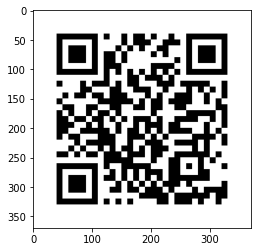

In [22]:
data = "Generador de códigos Qr para IRIS!"
filename = "IRISQRCode.png"

image = qrcode.make(data)

image.save(filename)
plt.imshow(image,cmap='gray')